##1. Preprocessing and Feature Engineering


> Add blockquote




In [ ]:
df = pd.read_csv("creditcard.csv")


In [ ]:
data=df.copy()
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.fillna(data.mean(), inplace=True)

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
df.drop_duplicates(inplace=True)

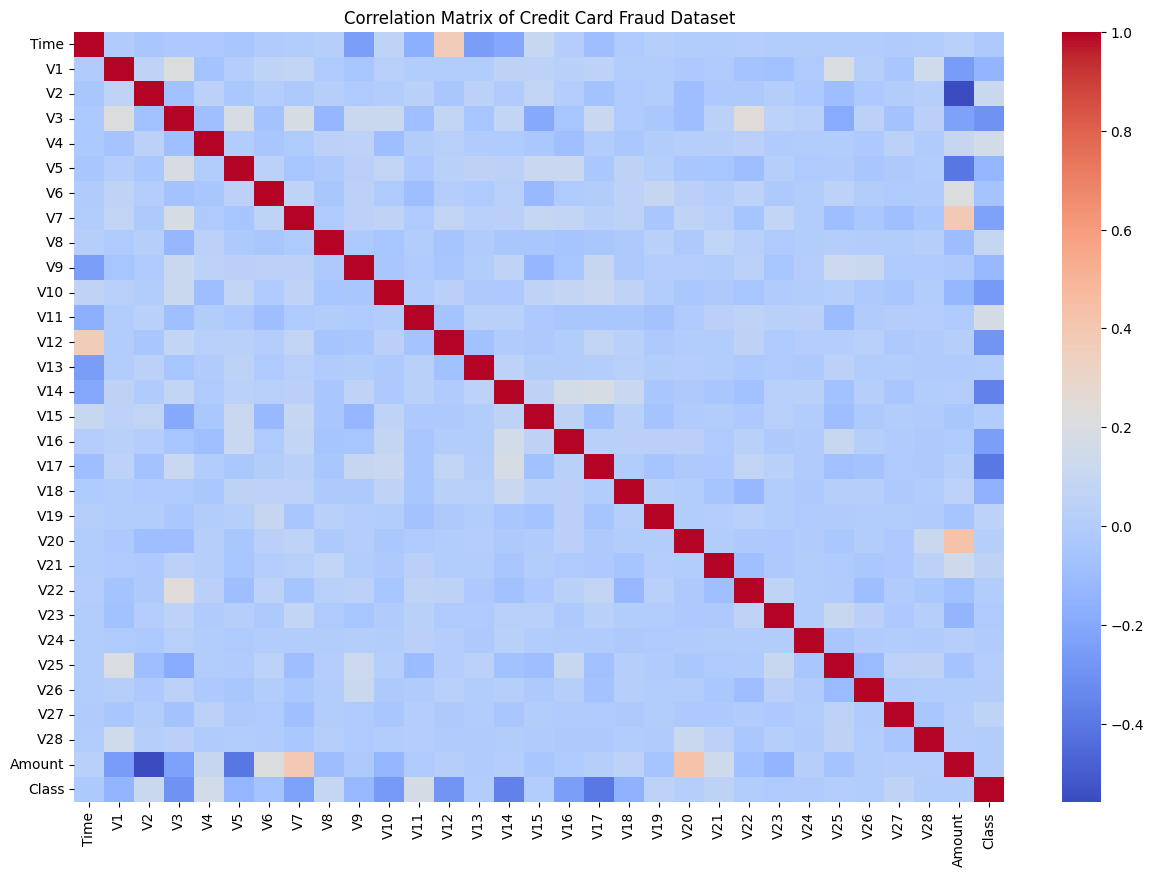

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Credit Card Fraud Dataset")
plt.show()

In [ ]:
y.value_counts()

,count
Class,
0.000000,110764
1.000000,239
0.002153,1


In [ ]:
df['Class'] = df['Class'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

# Calculate test size to keep 994 rows
rows_needed = 994
test_size = (len(df) - rows_needed) / len(df)

# Perform random sampling without stratification
df, _ = train_test_split(df, test_size=test_size, random_state=42)

# Save the reduced dataset
sampled_df.to_csv('reduced_dataset.csv', index=False)
# Ensure 'Class' is of integer type before assigning it to y
df['Class'] = df['Class'].astype(int)
X = df.drop('Class', axis=1)
y = df['Class']  # Re-assign y after type conversion


InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 1.0 instead.

In [ ]:

# Now proceed with SMOTE
# Set k_neighbors to a value less than or equal to the smallest minority class size
smote = SMOTE(random_state=42, k_neighbors=3) # or even lower like 2, or 1
X_resampled, y_resampled = smote.fit_resample(X, y)